<a href="https://colab.research.google.com/github/mrrkdas/LazyProgrammer-DeepLearning-Course/blob/main/CNN_with_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Input, Dropout, Flatten, GlobalMaxPooling2D
import numpy as np

In [19]:
cifar_10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar_10.load_data()

## Preprocessing

In [20]:
X_train = X_train / 255
X_test = X_test / 255

In [21]:
y_train, y_test = y_train.flatten(), y_test.flatten()

## Model

In [22]:
input = Input((32, 32, 3))

conv1 = Conv2D(32, (3,3), activation = 'relu')

x = conv1(input)
x = Conv2D(32, (3,3), activation = 'relu') (x)
x - GlobalMaxPooling2D() (x)
x = Conv2D(64, (3,3), activation = 'relu') (x)
x = GlobalMaxPooling2D() (x)
x = Flatten() (x)
x = Dropout(0.5) (x)
x = Dense(1024, activation= 'relu') (x)
x = Dropout(0.2) (x)

output = Dense(10, activation = 'softmax') (x)

In [23]:
model = tf.keras.models.Model(input, output)

In [24]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['sparse_categorical_accuracy'])

In [25]:
r = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 222s 142ms/step - loss: 1.8704 - sparse_categorical_accuracy: 0.2890
Epoch 2/5
1563/1563 [==============================] - 216s 138ms/step - loss: 1.6417 - sparse_categorical_accuracy: 0.3798
Epoch 3/5
1563/1563 [==============================] - 217s 139ms/step - loss: 1.5615 - sparse_categorical_accuracy: 0.4161
Epoch 4/5
1563/1563 [==============================] - 216s 138ms/step - loss: 1.5147 - sparse_categorical_accuracy: 0.4379
Epoch 5/5
1563/1563 [==============================] - 217s 139ms/step - loss: 1.4782 - sparse_categorical_accuracy: 0.4555


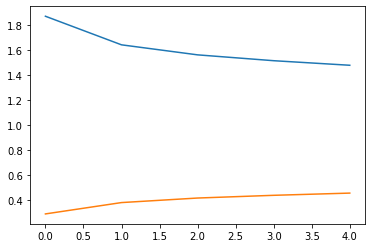

In [26]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['sparse_categorical_accuracy'])

Confusion matrix, without normalization
[[402  45  36  19   4  11  13  23 346 101]
 [  9 621   3   4   0   0   2   4  57 300]
 [ 86  25 272  99  49  93 194  75  75  32]
 [ 26  12  62 282  21 253  89  84  67 104]
 [ 32   9 122  57 231  63 231 176  37  42]
 [ 15  15  38 144  24 508  62  90  43  61]
 [ 10  16  71  86  22  32 663  58  17  25]
 [ 18  12  40  38  28  90  25 589  25 135]
 [ 57  40   6  17   1   7   5   9 755 103]
 [ 11  88   2   6   1   5   4  12  59 812]]


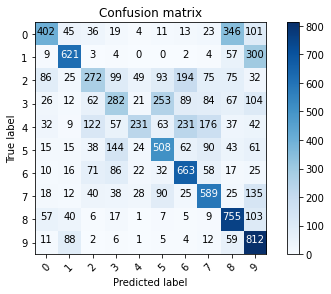

In [27]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

